# Lab 2:  Problem 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

We want to solve the fixed point system $x = f(x)$ where $f(x) = \cos(0.5\pi x)+1$, using a fixed point iteration. Verify that $x=1$ is a solution to this fixed point system. 

**a)** Explain (with less than three sentences) why $[0,2]$ is a natural choice of a domain for a fixed point iteration for solving $x = f(x)$. 

<font color='blue'>
    
$f : [0, 2] \rightarrow [0, 2]$.

</font>

**b)** Fixed point iterations. Write a function which runs a fixed point iteration for $f$ and returns the sequence of iterations $[x_0, x_1, x_2, \ldots, x_n]$. Using initial point $x_0 = 0.1$, plot the evolution of the error as a function of the number of iterations. Does the iteration seem to converge?

In [4]:
# In python you can create functions using the lambda function.
# For example: with the following decleration, f is now a function for which f(x) evaluates sin(x)
# f = lambda x: np.sin(x)


def banach_fp(f, x0, n):
    # f: the function for which to solve x=f(x)
    # x0: initial value
    # n: number of iterations
    
    x = np.zeros(n)
    x[0] = f(x0)
    
    for i in range(1, n):
        x[i] = f(x[i-1])
    
    return x
    

# The banac_fp function is called in the following way:
# x = banach_fp(f, x0, n, p)

In [5]:
def f(x): return np.cos(x * np.pi / 2) + 1

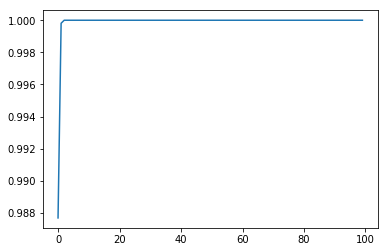

In [6]:
x = banach_fp(f, 0.1, 100)

import matplotlib.pyplot as plt

plt.plot(abs(x - 1)); # error graph

<font color='blue'>
    
It never converges.

</font>

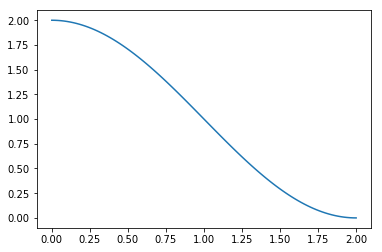

In [7]:
plt.plot(np.linspace(0, 2, 100), f(np.linspace(0, 2, 100)));

In [8]:
f(0), f(2)

(2.0, 0.0)

<font color='blue'>
Just by looking at the graph of $f$, we see that $f : 0 \mapsto 2$
    and $f: 2 \mapsto 0$.

This means $d(f(x), f(y)) = d(x, y)$ for at least
one pair of points in the metric space. This is enough to disqualify $f$ as a contraction immediately, and thus Banachs fixed-point theorem does not hold, and thus we have no guarantee that the iteration converges.
As we can see, it does not.

</font>

As you hopefully observed in the previous subproblem, not all fixed point iterations will converge. However, we can in some cases modify the fixed point iteration such that it converges. If we for example add some constant or variable to both sides, the solution does not change. Therefore, let $p$ be some parameter, and add $px$ to both sides of our system to obtain

$$ x + px = \cos(0.5\pi x) + 1 + px $$

Verify for yourselves that this can be rewritten into

$$ x = \frac{1}{1+p} \big( \cos(0.5\pi x) + 1 + px \big) =: g(x) $$

We will in the following assume $p\geq0$.

**b)** Modify your code to run the fixed point iteration to run $x_{n+1} = g(x_n)$. Test different values of $0\leq p\leq 2$. Which values of $p$ seem to give convergence?

*Hint*: If you followed the template above, you can reuse the banach_fp function and just change the function $f$.

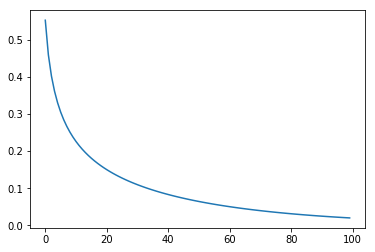

In [9]:
p = 0.3

x_mod = banach_fp(
    f  = lambda x: 1/(1 + p) * (f(x) + p * x),
    x0 = 0.1,
    n  = 100
)

plt.plot(abs(x_mod - 1)); # error graph

<font color='blue'>
Obviously, if $p = 0$, there is no difference, so that doesnt converge.
    $p \geq 0.3$ seems to make it converge.
</font>

**c)** Test $p=0.5,1,1.5$ and $2$ and make a convergence plot. Additionally, give a rough estimate of the convergence rate of the method.  

*Hint:* For fixed point iterations, the error is in general of the form $\|x_n-x^\ast\| = \mathcal O(q^n)$, where $q$ determines the order of convergence. Plot lines of the form $l(n) \propto q^n$ and experiment to find values of $q$ which corresponds to the convergence plots for the fixed point iterations.

In [10]:
ps = [0.5, 1, 1.5, 2]
N = 25 # number of iterations

X = np.zeros((N, len(ps)))

for i in range(len(ps)):
    p = ps[i]
    X[:,i] = x_mod = banach_fp(
        f  = lambda x: 1/(1 + p) * (f(x) + p * x),
        x0 = 0.1,
        n  = N
    )

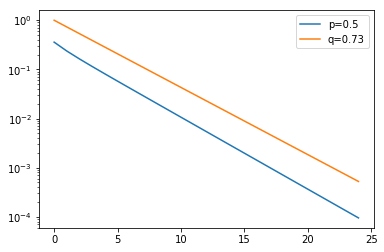

In [20]:
plt.plot(abs(X[:,0] - 1), label='p=0.5')

q = 0.73
plt.plot(q**np.arange(25), label='q=0.73')

plt.yscale('log')
plt.legend();

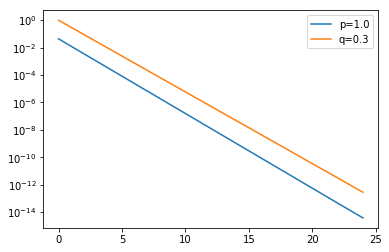

In [21]:
plt.plot(abs(X[:,1] - 1), label='p=1.0')

q = 0.3
plt.plot(q**np.arange(25), label='q=0.3')

plt.yscale('log')
plt.legend();

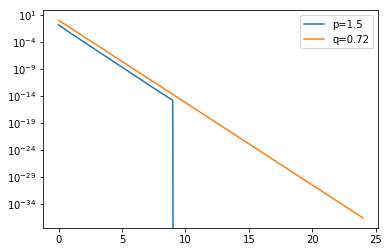

In [22]:
plt.plot(abs(X[:,2] - 1), label='p=1.5')

q = 0.03
plt.plot(q**np.arange(25), label='q=0.72')

plt.yscale('log')
plt.legend();

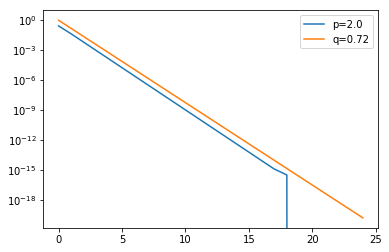

In [23]:
plt.plot(abs(X[:,3] - 1), label='p=2.0')

q = 0.15
plt.plot(q**np.arange(25), label='q=0.72')

plt.yscale('log')
plt.legend();

<font color='blue'>
Fill in your observed convergence rates in the following table:
</font>

| $p$ | $q$  |
|:---:|:----:|
| 0.5 |    0.73  |
| 1.0 |    0.3  |
| 1.5 |    0.03  |
| 2.0 |    0.15  |

**d)** Show that the Lipschitz constant for $g$ with domain $[0,2]$ is given by 
$$ L = \frac{1}{1+p}\max\{p,0.5\pi-p\}. $$

*Hint:* Recall that for continuously differentiable, real-valued functions g, and compact domains $D$, the Lipschitz constant is given by
$$ L = \max_{x\in D} | g'(x) |. $$
You might also find the property $|x| = \max\{x,-x\}$ helpful in solving this problem.

<font color='blue'>
$$
L = \max_x \left|\frac {dg} {dx} \right|
  =  \frac 1 {1 + p} \max_x\left| \frac {df} {dx} + p\right|
$$
and we can differentiate $f$:
$$
L =  \frac 1 {1 + p} \max_x\left| -\frac \pi 2 \sin \frac \pi 2 x + p\right|
$$
and notice that the $\sin$ term does half a loop around the unit circle over  the interval $[0, 2]$, and takes maximum and minimum values $\frac \pi 2$ and $0$ respectively. These are subtracted from $p$.
In other words, the maximum of this is $p - 0$, and the minimum is $p - \frac \pi 2$.

Changing $p$ moves the whole thing up and down, so this is what ultimately decides which of the two values are largest in absolute value. We don't have to care about this, since we can just take the maximum. Also note, that $|p - \frac \pi 2| = \frac \pi 2 - p$ as long as $p < \frac \pi 2$, and if $p$ exceeds ths bound, $p$ is itself the maximum.
Conclusion:
$$
L = \frac{1}{1+p}\max\left\{p,\frac \pi 2 - p\right\}
$$
</font>

The Banach fixed point theorem tells us that $\|x_{n+1} - x^\ast\| \leq L\|x_n - x^\ast\|$. In particular, this means that $\|x_n - x^\ast\| = \mathcal O(L^n)$. 

**e)** Compute $L$ and $g'(1)$ for $p = 0.5,1,1.5$ and $2$ and compare with the order of convergence you observed in problem **2c**. What do you observe?

<font color='blue'>
    
Fill out the following table:

| $p$ | $L$  |  $ g'(1)$      | $q$  |
|:---:|:----:|:-------:|:----:|
| 0.5 |  0.71   |    -0.71    |  0.73   |
| 1.0 |  0.50  |    -0.28    |  0.3   |
| 1.5 |  0.60   |    -0.028    |  0.03   |
| 2.0 |  0.66   |    0.14    |  0.15|


The Lipschitz constant should be a upper bound on the rate of convergence.
$g'(1)$ is alomost exactly equal to the convergence rate.
This can be understood, because assuming we get "relatively close"
to the fixed-point (remember $g(1) = 1$) in relatively short time, we can approximate the function
with a taylor-expansion, and for linear functions, the Lipschitz constant
is the same everywhere, equal to the slope, so "close enough" to the fixed point,
the rate of convergence should always be "close" to the slope at the fixed point.

Naturally, to minimize the Lipchitz constant, we want to crank up $p$ as much as we can,
to grow the denominator. As $p$ approaches $\pi \over 2$, the numerator also goes to zero,
but _as soon_ as we step over, the denominator grows again, so that the whole thing becomes
$$
\frac p {1 + p}
$$
which everyone knows tends to 1 as $p \rightarrow \infty$, so past this point we get
no benefit from increasing $p$. The closer we push $L$ to $1$, the slower the convergence, as this
is the upper bound for the Lipschitz constant.

Since $\frac \pi 2 \approx 1.57$, naturally $p = 1.5$ is a very good choice, and this is exactly what we can see.
</font>

In [25]:
def dgdx(p): return lambda x: (1/(1+p)) * (-0.5*np.pi*np.sin(0.5*np.pi*x) + p)

for i, p in enumerate([0.5, 1.0, 1.5, 2.0]):
    L = (1 / (1 + p)) * max(p, 0.5*np.pi - p)
    print(i, p, L, dgdx(p)(1))

0 0.5 0.7138642178632644 -0.7138642178632644
1 1.0 0.5 -0.2853981633974483
2 1.5 0.6000000000000001 -0.028318530717958625
3 2.0 0.6666666666666666 0.14306789106836781
